# Short Assignment 1

This is an individual assignment.

---
## Objectives

* Define basic terminology in supervised learning algorithms.
* Develop a supervised learning algorithm for regression tasks.
* Implement linear regression model with Python code.
* Utilize trained model for making predictions and measure performance.
---

# Question 1 (1 point)

**Assume we are given the task of building a system to distinguish an email as spam or ham (not spam).**

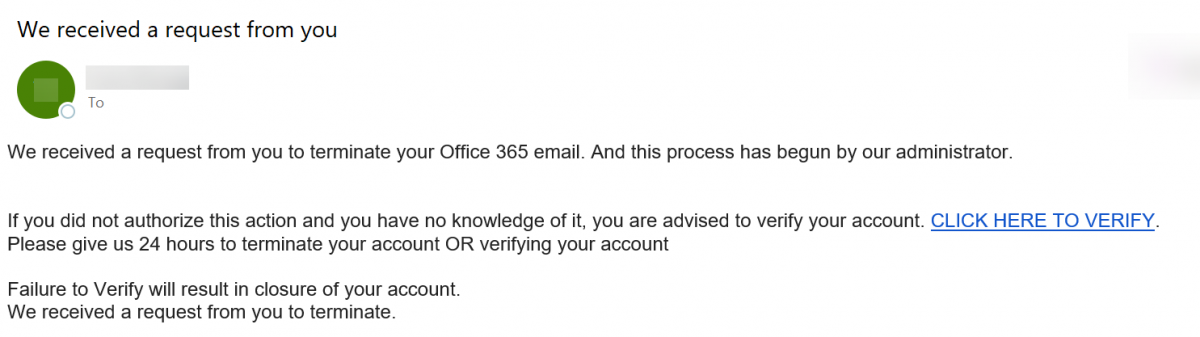

In [1]:
from IPython.display import Image
Image('figures/spam_email.png', width=900)

**Use the fundamental components of a supervised learning system to illustrate how you would design a system to solve this task. Explain the role of each component in the system in accomplishing the task of classifying an email as spam or ham.**

- **Data Collection & Preprocessing:** Gather labeled email data and clean it by removing HTML tags and special characters. Tokenize text for analysis.
- **Feature Extraction:** Select key features from email content, like word frequency and metadata. Encode these features numerically for machine learning.
- **Data Splitting:** Divide the dataset into training (for model learning) and testing (for evaluation) sets. 
- **Algorithm Selection:** Choose a suitable machine learning algorithm for email classification, like Naive Bayes or SVM.
- **Model Training:** Train the model using the training data to learn patterns distinguishing spam from ham.
- **Model Evaluation:** Assess model performance on the testing dataset using metrics like accuracy and precision.
- **Hyperparameter Tuning:** Fine-tune model settings to optimize its performance.

---

# Question 2 (1.5 points)

**Consider the training set with $N$ data points $\{x_i\}_{i=1}^N$, where $x_i\in\mathbb{R}$, and its corresponding target labels $\{t_i\}_{i=1}^N$, where $t_i\in\mathbb{R}$. Consider the feature representation**

$$\phi(x) = [1, \phi_1(x), \phi_2(x), \dots, \phi_M(x)]^T$$

**where $\phi_i(x)$ is a Gaussian basis function defined as:**

$$\phi_i(x)= \exp(-\gamma_i (x - \mu_i)^2),\;\;\; i=1,\dots, M$$

**with $\mu_i$ as the center of component $i$ and $\gamma_i$ the precision (inverse of variance) of component $i$.**

**Answer the following questions:**

1. (0.5 points) **Write down the feature matrix $\mathbf{X}$ for $M=2$. Keep your notation neat.**

2. (0.5 points) **What are the hyperparameters in this problem?**

- The hyperparameters in this problem are M (number of Gaussian basis components), μi (basis function centers), Vi (basis function precisions), and Y (target precision). They control the model's complexity, basis function characteristics, and target noise.

3. (0.5 points) **Suppose you want to minimize the *squared error* with a *Lasso regularizer*. Write down the objective function.**

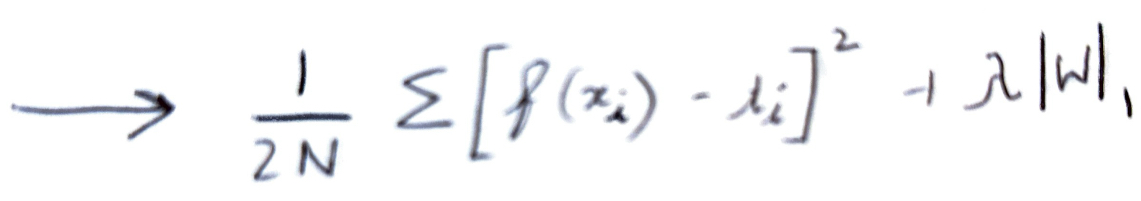

In [2]:
from IPython.display import Image
Image('2.3_lasso.jpeg', width=900)

Where:
- **N** is the number of data points.
- **f(x_i)** represents the prediction made by the model for data point x_i using the feature representation Q(x).
- **t_i** is the true target label for data point x_i.
- **λ** is the regularization parameter that controls the strength of regularization.
- **|W|_1** represents the L1 norm (sum of absolute values) of the weight vector W.

---

# Question 3 (1 point)

**Suppose that you are working with a two-dimensional features space, where $x_1$ and $x_2$ are the two features. Upon receiving a sample $\mathbf{x}=[x_1,x_2]^T$, the goal is to predict a continuous value $t$. Assume that we have examples of training pairs $\{(x_1,x_2)_i,t_i\}_{i=1}^N$. Suppose we want to make a quadratic mapper function of the form,**

\begin{align*}
    f(x_1,x_2) = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4(x_1)^2 + w_5(x_2)^2
\end{align*}

**Explain how you can find an analytical solution for $w_i \;\; i=0,1,\dots,5$.**

---

In [3]:
# Import necessary libraries and magics



# Question 4 (3 points)

**In this problem, you will be working with the beer dataset with information about the foam height (in cm) from 3 brands of beer over 15 measurement times (in seconds) after the time of pour.**

In [4]:
import pandas as pd

beer_data = pd.read_csv('beer_foam.csv')

beer_data

,Time,Erdinger,Augustinerbrau,Budweiser
0,0,17.0,14.0,14.0
1,15,16.1,11.8,12.1
2,30,14.9,10.5,10.9
3,45,14.0,9.3,10.0
4,60,13.2,8.5,9.3
5,75,12.5,7.7,8.6
6,90,11.9,7.1,8.0
7,105,11.2,6.5,7.5
8,120,10.7,6.0,7.0
9,150,9.7,5.3,6.2


**Consider the first 12 samples as the training set, and the last 3 samples as the test set.**

In [5]:
# Training and test sets
x_train = beer_data['Time'].to_numpy()[:12]
x_test  = beer_data['Time'].to_numpy()[12:]

# Training and test labels
t_train = beer_data.drop('Time', axis=1).iloc[:12]
t_test  = beer_data.drop('Time', axis=1).iloc[12:]
# Note that t_train and t_test contain 3 target vectors.

**Use the Python code implementation we built in class to help you train a mapper function of the form:**

$$y(x) = \exp\left(\sum_{j=0}^M w_jx^j\right) = \exp (\mathbf{X}\mathbf{w})$$

**Answer the following questions:**

1. (1 point) **For each brand, train a mapper function with $M=2$ using the training data. Plot the model prediction.**

2. (1 point) **Use each trained model to make predictions for the test data.**

3. (1 point) **For each brand, predict foam height at $t=450$ seconds.**

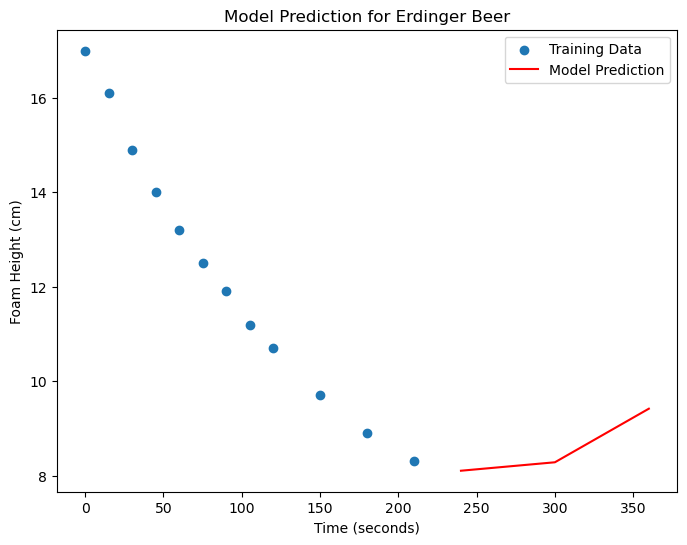

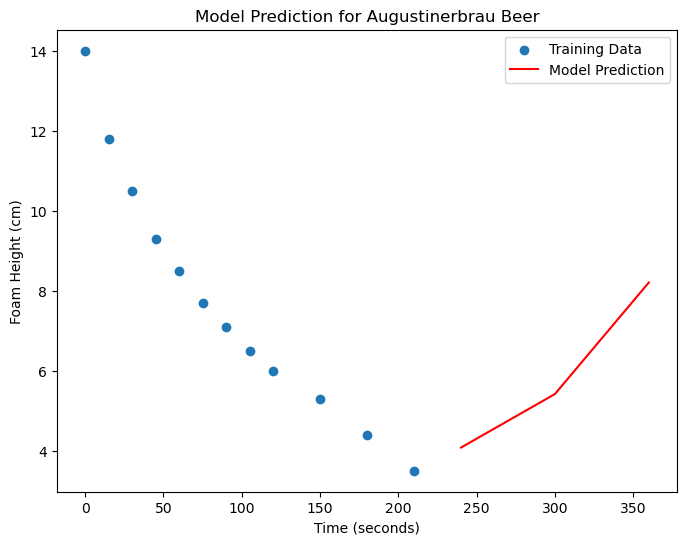

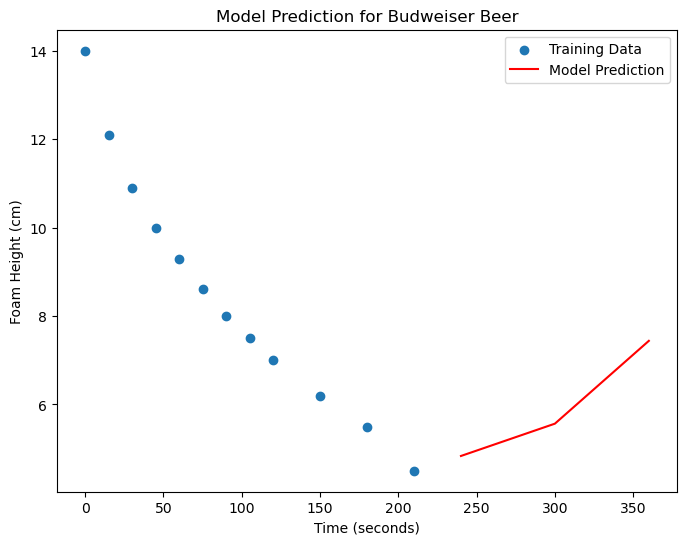

Predicted foam height for Erdinger at 450 seconds: 12.91 cm
Predicted foam height for Augustinerbrau at 450 seconds: 15.11 cm
Predicted foam height for Budweiser at 450 seconds: 12.39 cm


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

beer_data = pd.read_csv('beer_foam.csv')

x_train = beer_data['Time'].to_numpy()[:12]
x_test = beer_data['Time'].to_numpy()[12:]

t_train = beer_data.drop('Time', axis=1).iloc[:12]
t_test = beer_data.drop('Time', axis=1).iloc[12:]

models = {}
test_predictions = {}
foam_height_predictions = {}

def train_and_predict(brand):
    t_train_brand = t_train[brand].to_numpy()
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(x_train.reshape(-1, 1), t_train_brand)
    models[brand] = model
    test_predictions[brand] = model.predict(x_test.reshape(-1, 1))
    time_to_predict = 450
    foam_height_predictions[brand] = model.predict(np.array([[time_to_predict]]))[0]

for brand in t_train.columns:
    train_and_predict(brand)

for brand in models.keys():
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train, t_train[brand], label='Training Data')
    plt.plot(x_test, test_predictions[brand], color='red', label='Model Prediction')
    plt.title(f'Model Prediction for {brand} Beer')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Foam Height (cm)')
    plt.legend()
    plt.show()

for brand, prediction in foam_height_predictions.items():
    print(f'Predicted foam height for {brand} at 450 seconds: {prediction:.2f} cm')


---

# Question 5 (2.5 points)

**Consider the [**computer hardware dataset**](https://archive.ics.uci.edu/ml/datasets/Computer+Hardware). The goal is to predict the estimated relative performance (ERP) of a CPU core as a function of 9 features (or independent variables):**

* **Vendor name:** 30 (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, sratus, wang)
* **Model Name:** many unique symbols
* **MYCT:** machine cycle time in nanoseconds (integer)
* **MMIN:** minimum main memory in kilobytes (integer)
* **MMAX:** maximum main memory in kilobytes (integer)
* **CACH:** cache memory in kilobytes (integer)
* **CHMIN:** minimum channels in units (integer)
* **CHMAX:** maximum channels in units (integer)
* **PRP:** published relative performance (integer)

**And the target is:**

* **ERP:** estimated relative performance from the original article (integer).

In [7]:
import pandas as pd

hardware=pd.read_csv('machine.data',
                 names=['Vendor','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])
hardware

,Vendor,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [8]:
# Feature matrix
data = hardware.drop('ERP', axis=1)
data

,Vendor,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,32/60,125,256,6000,256,16,128,198
1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,amdahl,470v/7c,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46
206,sratus,32,125,2000,8000,0,2,14,52
207,wang,vs-100,480,512,8000,32,0,0,67


In [9]:
# Target labels
target = hardware['ERP']
target

0      199
1      253
2      253
3      253
4      132
      ... 
204     37
205     50
206     41
207     47
208     25
Name: ERP, Length: 209, dtype: int64

**Consider only the numerical features: MYCT, MMIN, MMAX, CACH, CHMIN, CHMAX, and PRP.**

**Answer the following questions:**

1. (0.5 points) **Partition the data randomly using an 80/20 split. See [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).**

2. (1 point) **Train a multivariate regression model using the training data.**

3. (1 point) **Make predictions in the test set and report performance.**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

hardware=pd.read_csv('machine.data',
names=['Vendor','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])

# Selecting the numerical features
numerical_features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']
data = hardware[numerical_features]

target = hardware['ERP']

# Spliting the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

#Training the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)


Mean Absolute Error (MAE): 25.515717586190323
Mean Squared Error (MSE): 3007.8898321639376
R-squared (R^2): 0.9440465034138786


---

# On-Time (1 point)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___